# Lidando com os dados

Realizando as importações

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

Criando os dataframes iniciais

In [3]:
treino = pd.read_csv('data/train.csv')
final = pd.read_csv('data/test.csv')

Visualização Inicial dos dataframes

In [49]:
def ver_colunas(dataset):
    colunas = dataset.columns
    view_colunas = ''
    for coluna in colunas:
        view_colunas += f'  -  {coluna}'
    print(view_colunas)

ver_colunas(treino)

  -  Id  -  Elevação  -  Azimute  -  Declive  -  H_Dist_Hidrologia  -  V_Dist_Hidrologia  -  H_Dist_Estradas  -  Sombra_09h  -  Sombra_12h  -  Sombra_15h  -  H_Dist_Foco_Incêndio  -  Wilderness_Area1  -  Wilderness_Area2  -  Wilderness_Area3  -  Wilderness_Area4  -  Soil_Type1  -  Soil_Type2  -  Soil_Type3  -  Soil_Type4  -  Soil_Type5  -  Soil_Type6  -  Soil_Type8  -  Soil_Type9  -  Soil_Type10  -  Soil_Type11  -  Soil_Type12  -  Soil_Type13  -  Soil_Type14  -  Soil_Type16  -  Soil_Type17  -  Soil_Type18  -  Soil_Type19  -  Soil_Type20  -  Soil_Type21  -  Soil_Type22  -  Soil_Type23  -  Soil_Type24  -  Soil_Type25  -  Soil_Type26  -  Soil_Type27  -  Soil_Type28  -  Soil_Type29  -  Soil_Type30  -  Soil_Type31  -  Soil_Type32  -  Soil_Type33  -  Soil_Type34  -  Soil_Type35  -  Soil_Type36  -  Soil_Type37  -  Soil_Type38  -  Soil_Type39  -  Soil_Type40  -  Tipo_Vegetação


Traduzindo as colunas

In [5]:
#Não há necessidade de traduzir os Soil_TypeX ou os Wilderness_AreaX

dict_traducao = {'Elevation': 'Elevação','Aspect':'Azimute','Slope':'Declive', 'Horizontal_Distance_To_Hydrology':'H_Dist_Hidrologia',
'Vertical_Distance_To_Hydrology':'V_Dist_Hidrologia','Horizontal_Distance_To_Roadways':'H_Dist_Estradas',
'Hillshade_9am':'Sombra_09h','Hillshade_Noon':'Sombra_12h','Hillshade_3pm':'Sombra_15h',
'Horizontal_Distance_To_Fire_Points':'H_Dist_Foco_Incêndio','Cover_Type':'Tipo_Vegetação'}

In [6]:
treino.rename(columns=dict_traducao, inplace = True)
final.rename(columns=dict_traducao, inplace = True)

ver_colunas(treino)

  -  Id  -  Elevação  -  Azimute  -  Declive  -  H_Dist_Hidrologia  -  V_Dist_Hidrologia  -  H_Dist_Estradas  -  Sombra_09h  -  Sombra_12h  -  Sombra_15h  -  H_Dist_Foco_Incêndio  -  Wilderness_Area1  -  Wilderness_Area2  -  Wilderness_Area3  -  Wilderness_Area4  -  Soil_Type1  -  Soil_Type2  -  Soil_Type3  -  Soil_Type4  -  Soil_Type5  -  Soil_Type6  -  Soil_Type7  -  Soil_Type8  -  Soil_Type9  -  Soil_Type10  -  Soil_Type11  -  Soil_Type12  -  Soil_Type13  -  Soil_Type14  -  Soil_Type15  -  Soil_Type16  -  Soil_Type17  -  Soil_Type18  -  Soil_Type19  -  Soil_Type20  -  Soil_Type21  -  Soil_Type22  -  Soil_Type23  -  Soil_Type24  -  Soil_Type25  -  Soil_Type26  -  Soil_Type27  -  Soil_Type28  -  Soil_Type29  -  Soil_Type30  -  Soil_Type31  -  Soil_Type32  -  Soil_Type33  -  Soil_Type34  -  Soil_Type35  -  Soil_Type36  -  Soil_Type37  -  Soil_Type38  -  Soil_Type39  -  Soil_Type40  -  Tipo_Vegetação


Tratando os Dados

In [7]:
#Verificando dados nulos
treino.isnull().values.any() and final.isnull().values.any()

False

In [8]:
constantes = []
for coluna in treino.columns:
    if len(treino[coluna].value_counts()) == 1:
        constantes.append(coluna)

print(constantes)

['Soil_Type7', 'Soil_Type15']


In [9]:
#Os solos 7 e 15 são constantes

treino.drop('Soil_Type7',axis=1,inplace=True)
treino.drop('Soil_Type15',axis=1,inplace=True)

final.drop('Soil_Type7',axis=1,inplace=True)
final.drop('Soil_Type15',axis=1,inplace=True)


Visualizando os dados


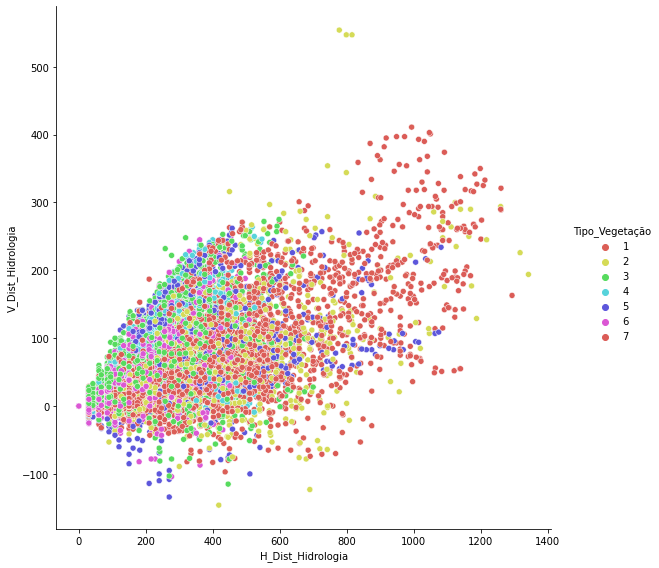

In [10]:
#Esse gráfico mostra os tipos de vegetação baseado na distância da água
#Assim, podemos perceber que quanto mais distante da água menor a variedade das vegetações

grafico = sns.pairplot(data = treino, hue='Tipo_Vegetação', height= 8, palette="hls",
x_vars='H_Dist_Hidrologia', y_vars='V_Dist_Hidrologia')

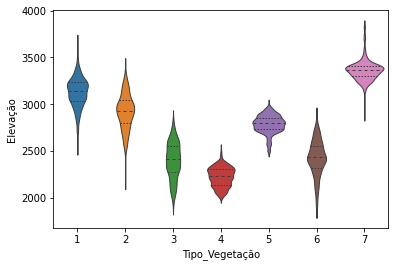

In [50]:
#Esse gráfico mostra os tipos de vegetação baseado na elevação
#Assim, podemos perceber que os tipos diferentes de vegetação possuem diferentes distrubuições ideais de altitude

grafico2 = sns.violinplot(data = treino ,x='Tipo_Vegetação', y='Elevação', inner="quart",split=True, linewidth=1)

# Criando o modelo

Realizando as importações

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Definindo as matrizes X e Y

y = treino.Tipo_Vegetação
x = treino.drop(['Tipo_Vegetação','Id' ],axis=1)

#Criando os sets de treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#Treinando o classificador

clf_RFC = RandomForestClassifier()
clf_RFC.fit(x_train,y_train)

#Validando o modelo

y_pred = clf_RFC.predict(x_test)
print(f'Acurácia = {accuracy_score(y_pred,y_test)*100}%')

Acurácia = 85.9126984126984%


In [ ]:
#Realizando a previsão com o dataframe final

x = final.drop('Id',axis=1)
y = clf_RFC.predict(x)

In [ ]:
#Exportando o dataframe final
submission_RFC = pd.DataFrame()
submission_RFC['Id'] = final['Id']
submission_RFC['Cover_Type'] = y
submission_RFC.set_index('Id', inplace = True)

submission_RFC.to_csv('submissions/submission_RFC.csv')
